In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")

⚡ Step 1: Load Your Dataset

In [2]:
df = pd.read_csv("/content/Titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Info about dataset # Summary statistics # Missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df_raw = df.copy()

In [8]:
df_raw['Embarked'].fillna(df_raw['Embarked'].mode()[0], inplace=True)
df_raw['Age'].fillna(df_raw['Age'].median(), inplace=True)
df_raw.drop(columns=['Cabin'], inplace=True)

In [9]:
print(df_raw.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


⚡ Step 3: Explore the Data

Try answering questions like:

Q1=How many people survived vs didn’t survive?

Q2=What’s the survival rate by gender?

Q3=Did class (1st, 2nd, 3rd) affect survival?

Q4=Was age important?

In [10]:
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
survived_count = df_raw['Survived'].sum()
not_survived = df_raw.shape[0]-survived_count
print(f"Number of people who survived: {survived_count}")
print(f"Number of people who did NOT survive: {not_survived}")



Number of people who survived: 342
Number of people who did NOT survive: 549


In [12]:
#Q2What’s the survival rate by gender?
survival_rate = df_raw.groupby('Sex')['Survived'].mean()
survival_rate


,Survived
Sex,
female,0.742038
male,0.188908


This clearly shows that women had a much higher survival rate than men on the Titanic

In [13]:
#Q3=Did class (1st, 2nd, 3rd) affect survival?
survival_rate_byclass = df_raw.groupby('Pclass')['Survived'].mean()
survival_rate_byclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Interpretation:

1st class: ~63% survived

2nd class: ~47% survived

3rd class: ~24% survived

This clearly shows: higher-class passengers had a much higher chance of survival.

In [14]:
age_by_survival = df_raw.groupby('Survived')['Age'].mean()
print(age_by_survival)

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


Non-survivors: ~30 years old

Survivors: ~28 years old

Slightly younger passengers tended to survive more.

But overall, age alone is not a very strong predictor; other factors like Sex and Pclass had more influence.

Q5=Which embarkation port (Embarked) had the highest survival rate?

In [15]:
survival_rate = df_raw.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)
print(survival_rate)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


Q6=Find the average fare paid by each passenger class.

In [16]:
avg_fare= df_raw.groupby('Pclass')['Fare'].mean()
print(avg_fare)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Visualization

Create a bar plot showing survival count by gender.

Plot a histogram of passenger ages.

Create a boxplot showing fare distribution across passenger classes.

Plot survival rates by gender and class (stacked bar plot).

      Sex  Survived
0  female       233
1    male       109


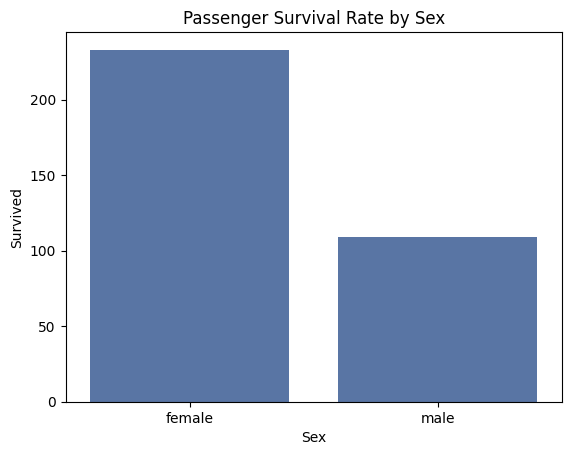

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Sex and count Survived
survival_count = df_raw.groupby('Sex')['Survived'].sum().reset_index()
print(survival_count)
# Plot
sns.barplot(data=survival_count, x='Sex', y='Survived')
plt.title("Passenger Survival Rate by Sex")
plt.show()

Plot a histogram of passenger ages

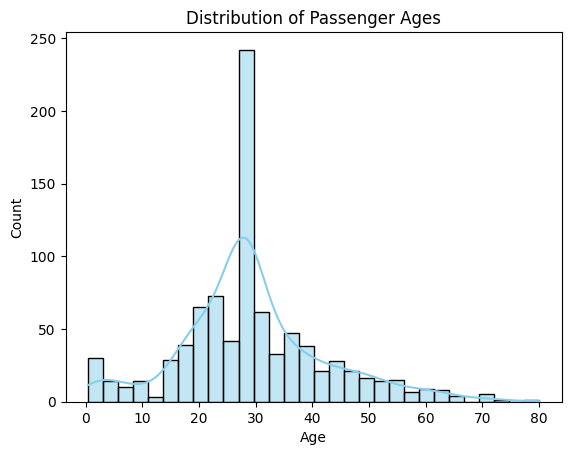

In [18]:
sns.histplot(data=df_raw, x='Age', bins=30, kde=True, color="skyblue")
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Create a boxplot showing fare distribution across passenger classes.

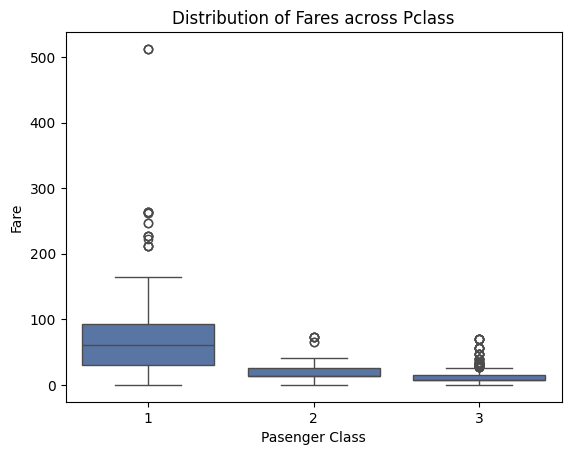

In [19]:

sns.boxplot(data=df_raw, x='Pclass', y='Fare')
plt.title("Distribution of Fares across Pclass")
plt.xlabel("Pasenger Class")
plt.ylabel("Fare")
plt.show()

Plot survival rates by gender and class (stacked bar plot).

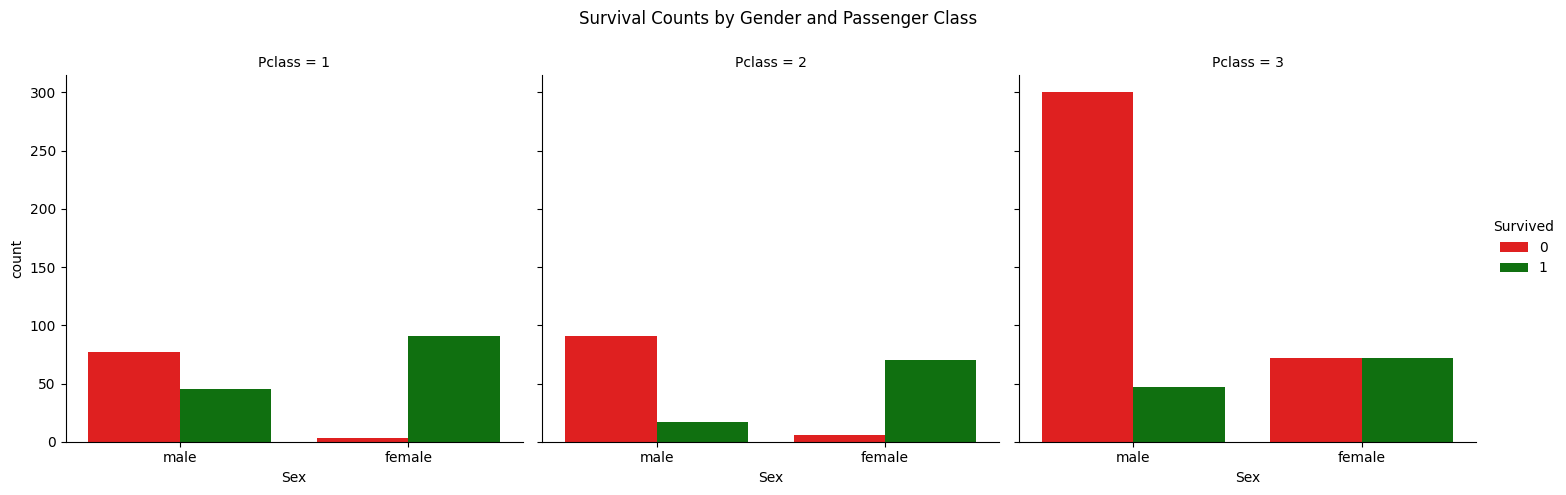

In [20]:
sns.catplot(
    data=df_raw,
    x='Sex',
    hue='Survived',
    col='Pclass',
    kind='count',   # counts automatically
    palette={0:'red', 1:'green'}
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Survival Counts by Gender and Passenger Class")
plt.show()

A correlation heatmap is a visual way to see how strongly numeric features (columns with numbers) are related to each other in your dataset.

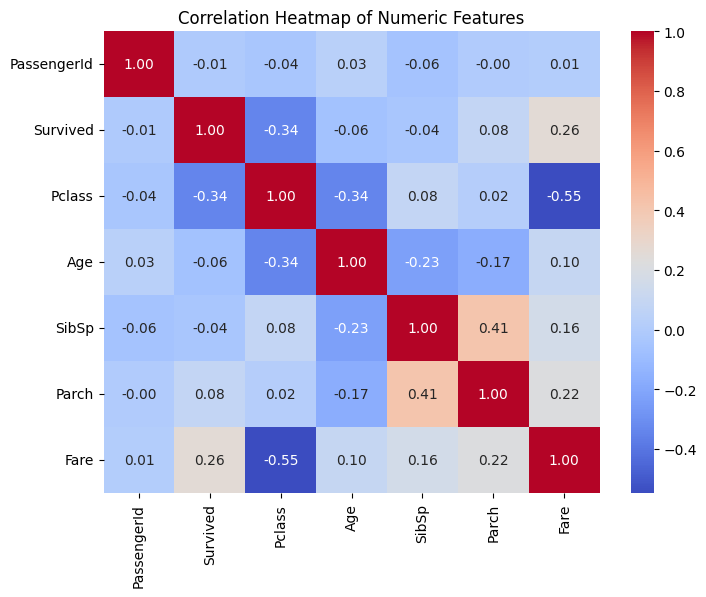

In [21]:
numeric_df = df_raw.select_dtypes(include=['int64','float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Build a pivot table showing survival rate by gender and class


In [22]:
import pandas as pd

# Pivot table: survival rate by Gender and Class
pivot = pd.pivot_table(df_raw,
                       values='Survived',
                       index='Sex',
                       columns='Pclass',
                       aggfunc='mean')

print(pivot)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


Find the top 5 passengers who paid the most fare

In [23]:
# Top 5 passengers who paid the highest fare
top5_fares = df.nlargest(5, 'Fare')[['Name',  'Sex', 'Fare']].reset_index(drop=True)
print(top5_fares)

                                 Name     Sex      Fare
0                    Ward, Miss. Anna  female  512.3292
1  Cardeza, Mr. Thomas Drake Martinez    male  512.3292
2              Lesurer, Mr. Gustave J    male  512.3292
3      Fortune, Mr. Charles Alexander    male  263.0000
4          Fortune, Miss. Mabel Helen  female  263.0000


What is the survival probability for a female, 1st class passenger, age < 18?


In [24]:
avg_Survival_rate = df_raw.loc[
    (df_raw['Pclass'] == 1) &
    (df_raw['Sex'] == 'female') &
    (df_raw['Age'] < 18) ,
    'Survived'].mean()

print("Average Survival rate of a female having pclass one and age less then 18 is :", avg_Survival_rate)


Average Survival rate of a female having pclass one and age less then 18 is : 0.875


Analyze how survival differed between passengers traveling alone vs. with family.

In [25]:
# Create a 'TravelAlone' column
df_raw['TravelRecord'] = ((df_raw['SibSp'] + df_raw['Parch']) == 0).astype(int)
# 1 = Alone, 0 = With family
# Group by TravelAlone and calculate average survival
survival_by_travel = df_raw.groupby('TravelRecord')['Survived'].mean()
print(survival_by_travel)


TravelRecord
0    0.505650
1    0.303538
Name: Survived, dtype: float64


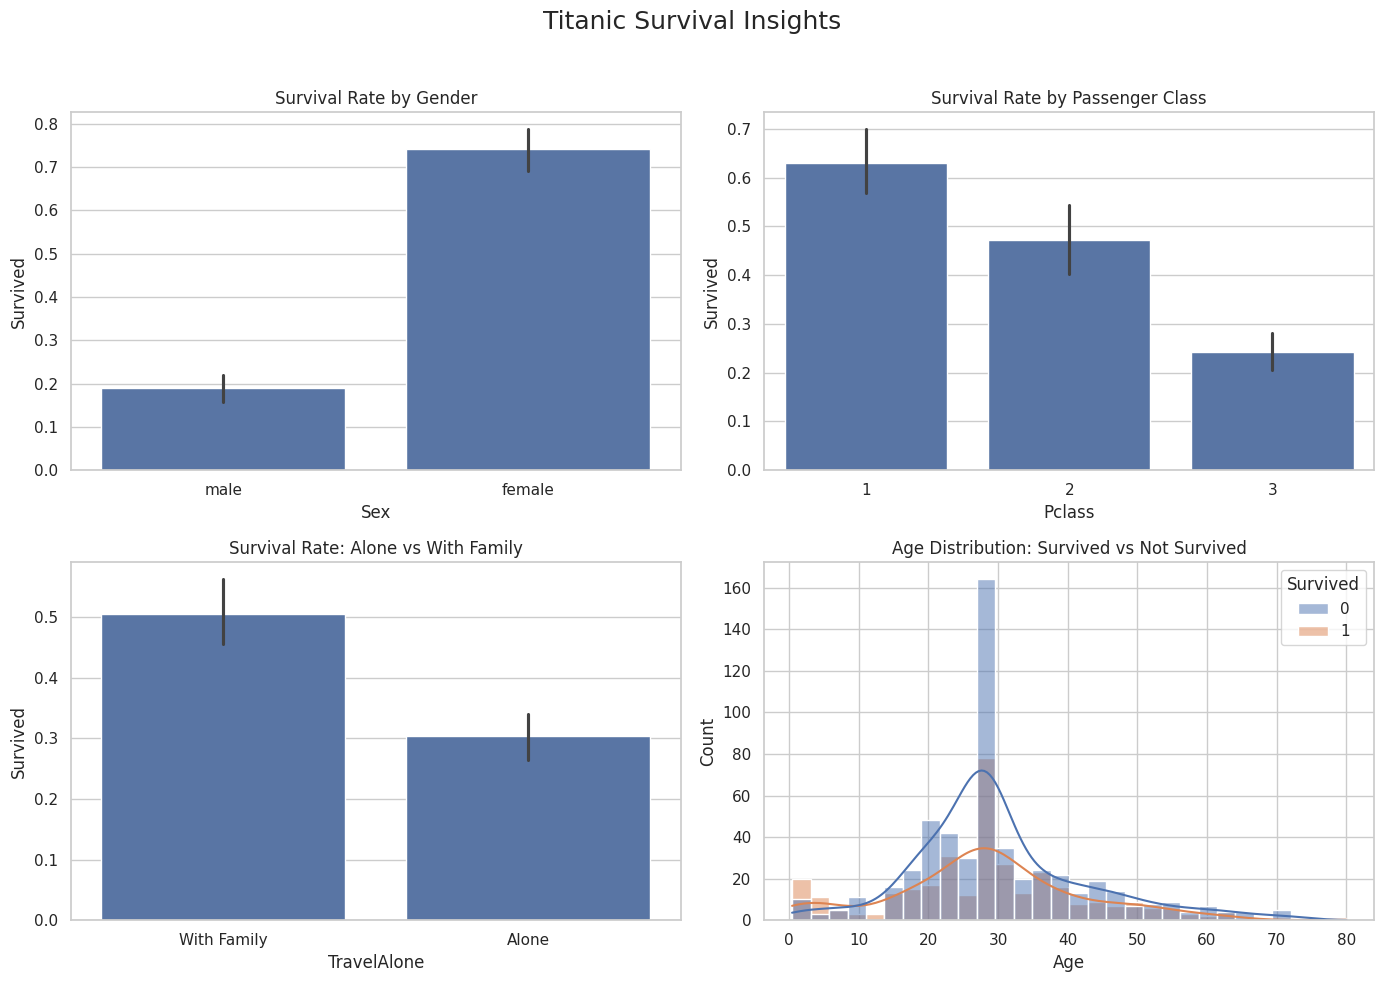

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Create 'TravelAlone' column
df_raw['TravelAlone'] = ((df_raw['SibSp'] + df_raw['Parch']) == 0).astype(int)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Titanic Survival Insights", fontsize=18)

# 1️⃣ Survival rate by Gender
sns.barplot(x='Sex', y='Survived', data=df_raw, ax=axes[0,0])
axes[0,0].set_title("Survival Rate by Gender")

# 2️⃣ Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df_raw, ax=axes[0,1])
axes[0,1].set_title("Survival Rate by Passenger Class")

# 3️⃣ Survival by Traveling Alone vs With Family
sns.barplot(x='TravelAlone', y='Survived', data=df_raw, ax=axes[1,0])
axes[1,0].set_xticklabels(['With Family', 'Alone'])
axes[1,0].set_title("Survival Rate: Alone vs With Family")

# 4️⃣ Age distribution of survivors vs non-survivors
sns.histplot(data=df_raw, x='Age', hue='Survived', bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Age Distribution: Survived vs Not Survived")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#What this dashboard shows:

#Survival by Gender:
 Highlights that females had higher survival probability than males.

#Survival by Pclass:
 Shows survival differences between passenger classes (1st, 2nd, 3rd).

#Survival Alone vs With Family:
Shows that traveling with family generally increased survival chances.

#Age Distribution:
 Compares ages of survivors vs non-survivors; usually, children had higher survival.